In [1]:
import pandas as pd
from pandas import Series, DataFrame

In [2]:
titanic_df = pd.read_csv('train.csv')

In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Here, we can notice that we have more non-null objects rest all are NaN objects, that we need to manipulate or remove

We are trying to answer the following questions using data analysis:

1. who were the passengers on the Titanic? 
2. What deck were the passengers on and how does that relate to their class?2
3. Where does the passengers come from?
4. who was alone and who was with family? 
5. What factors helped someone survive the sinking? 

In [6]:
# 1. who were the passengers on the Titanic? 

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot: xlabel='Sex', ylabel='count'>

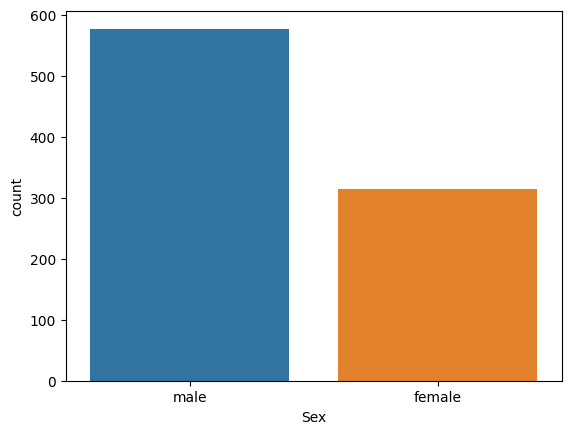

In [15]:
sns.countplot(x ='Sex', data = titanic_df)
# to show the ratio of males and females present

<AxesSubplot: xlabel='Sex', ylabel='count'>

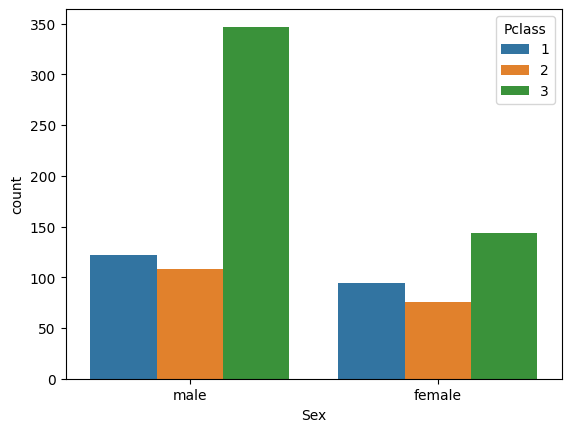

In [16]:
sns.countplot(x = 'Sex', data = titanic_df, hue = 'Pclass')
# hue divides the data further into levels based on 'pclass' feature

<AxesSubplot: xlabel='Pclass', ylabel='count'>

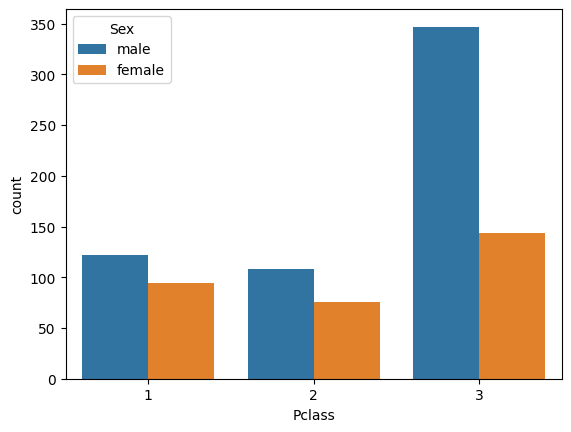

In [17]:
sns.countplot(x = 'Pclass', data = titanic_df, hue = 'Sex')
# we can also interchange the variables to try and get a better insight

Here we can observe that in class 3, there are more males than females. The other two levels does not show any significant difference

In [19]:
# Now, let's go and check if more women and children were in survivors, just to check the convention of women and
# children first 

In [20]:
# since we do not have an option if the person is child or not in the given data, we go ahead and create a funciton
# to segregate children from given data based on their list 

In [21]:
def segregate_child(passenger):
    age,sex = passenger
    
    if age < 16:
        return 'child'
    else:
        return sex

In [23]:
# Next, we create a new feature to differentiate male, female and a child

titanic_df['person'] = titanic_df[['Age',"Sex"]].apply(segregate_child, axis = 1)
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,male
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,female
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,female
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,male


In [24]:
titanic_df[:20]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


Now the dataset is valuable enough to know if the survivors are male, female or is a child

<AxesSubplot: xlabel='Pclass', ylabel='count'>

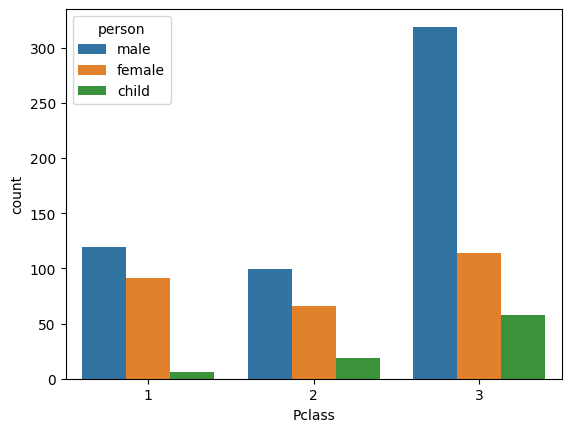

In [27]:
sns.countplot('Pclass', data = titanic_df, hue = 'person')

In [28]:
# we can notice that there were more children in class 3

<AxesSubplot: >

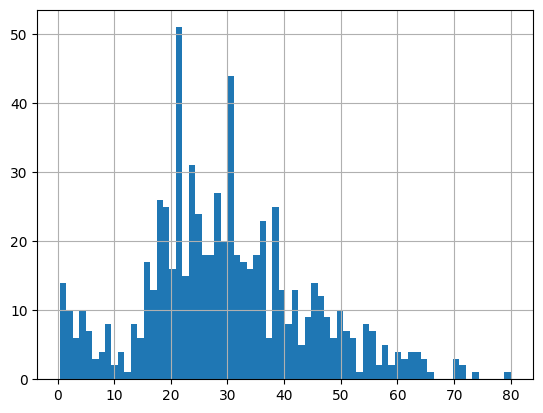

In [29]:
# creating a histogram to see the distribution of ages
titanic_df['Age'].hist(bins = 70)

In [30]:
# mean of the ages:

titanic_df['Age'].mean()

29.69911764705882

In [32]:
# overview of total counts of male, female and children
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

In [75]:
# 2. What deck were the passengers on and how does that relate to their class?2

/Users/hemakarnam/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/seaborn/axisgrid.py:747: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/Users/hemakarnam/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/seaborn/axisgrid.py:747: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


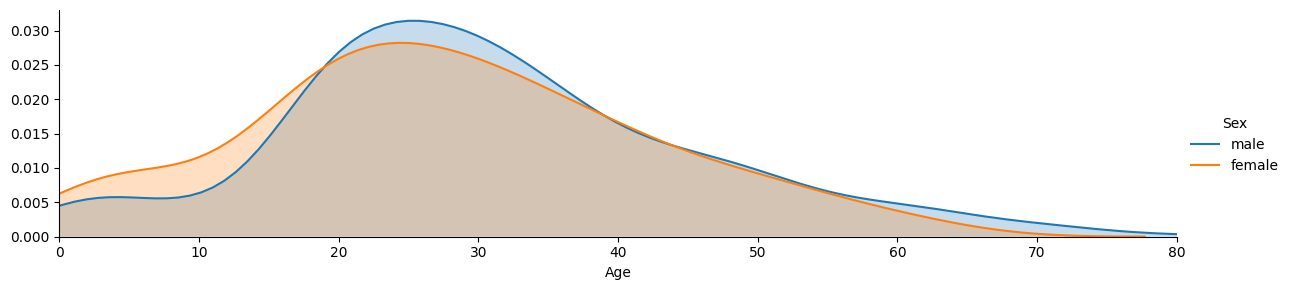

In [38]:
# facetgrid allows us to make multiple plots on one figure. 
# plotting all possible kde plots for "Age" feature

fig = sns.FacetGrid(titanic_df, hue = 'Sex', aspect = 4)
fig.map(sns.kdeplot,'Age',shade = True)

oldest = titanic_df['Age'].max()
fig.set(xlim = (0,oldest))
fig.add_legend()

/Users/hemakarnam/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/seaborn/axisgrid.py:747: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/Users/hemakarnam/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/seaborn/axisgrid.py:747: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/Users/hemakarnam/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/seaborn/axisgrid.py:747: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


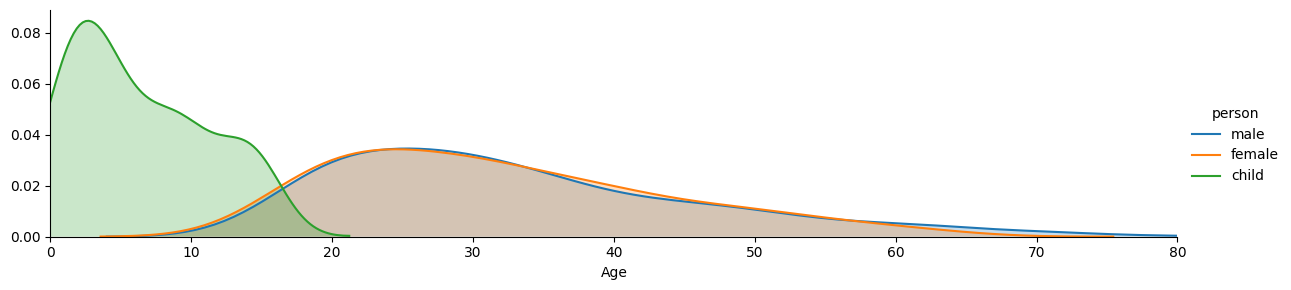

In [40]:
# to check the distribution probability of children and male/female

fig = sns.FacetGrid(titanic_df, hue = 'person', aspect = 4)
fig.map(sns.kdeplot,'Age',shade = True)

oldest = titanic_df['Age'].max()
fig.set(xlim = (0,oldest))
fig.add_legend()

/Users/hemakarnam/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/seaborn/axisgrid.py:747: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/Users/hemakarnam/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/seaborn/axisgrid.py:747: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/Users/hemakarnam/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/seaborn/axisgrid.py:747: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


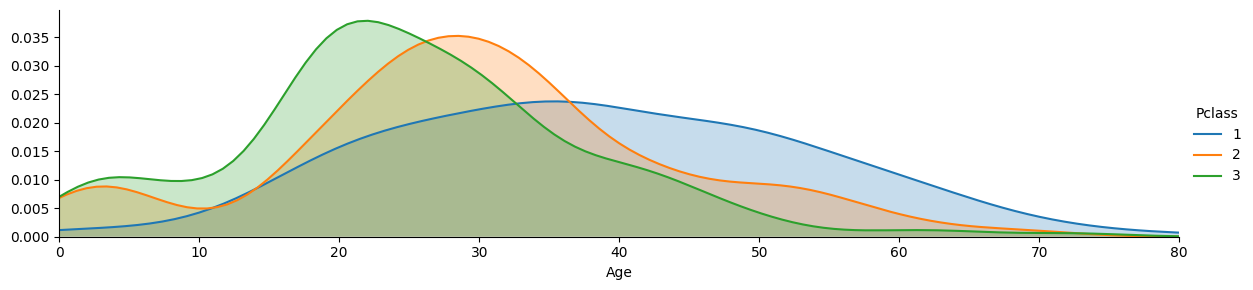

In [41]:
# checking the distribution according to 'Pclass' variable

fig = sns.FacetGrid(titanic_df, hue = 'Pclass', aspect = 4)
fig.map(sns.kdeplot,'Age',shade = True)

oldest = titanic_df['Age'].max()
fig.set(xlim = (0,oldest))
fig.add_legend()

while the distribution of males is normally distributed across three classes, we observe the second and third class to be slightly skewed to left(that is from age range 20 till 35)

In [43]:
titanic_df[:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


In [44]:
# we see several NaN values in 'cabin' feature. we are going to drop all the NaN values and save the info to 
# another variable . 

In [46]:
deck = titanic_df['Cabin'].dropna()

In [47]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

Now, to plot graph for cabin column, we need to sort the columns based on their first letter. and then make it into a seperate dataframe in itself and use catplot to plot it

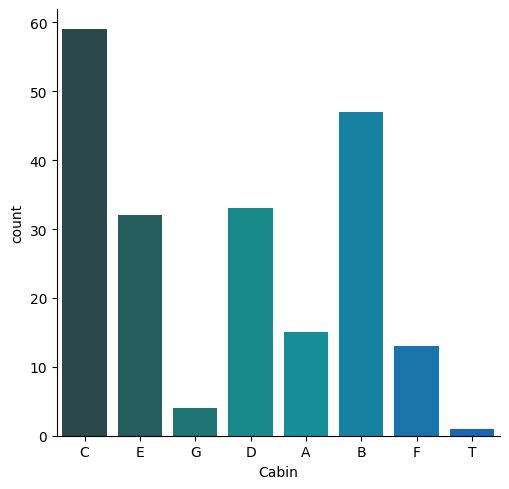

In [68]:
levels = []

for level in deck:
    levels.append(level[0])
    
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']

sns.catplot('Cabin',data = cabin_df, kind = 'count', palette = "winter_d")

In [69]:
cabin_df.sort_values(by = ['Cabin'], inplace = True)

In [70]:
cabin_df.head()

,Cabin
106,A
33,A
41,A
97,A
146,A


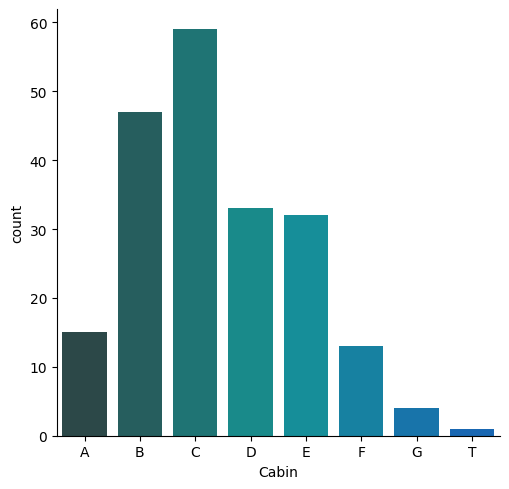

In [71]:
sns.catplot('Cabin',data = cabin_df, kind = 'count', palette = "winter_d")

<AxesSubplot: xlabel='Cabin', ylabel='count'>

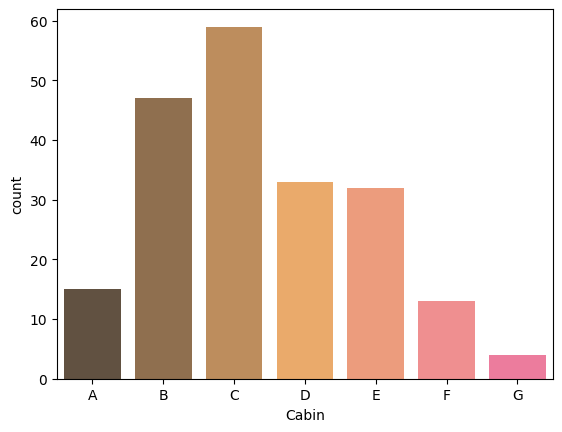

In [72]:
cabin_df = cabin_df[cabin_df.Cabin != 'T']
sns.countplot('Cabin', data = cabin_df, palette = 'spring_d')

In [77]:
# 3. Where does the passengers come from?

In [74]:
titanic_df[:3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female


Here, 'Embarked' column conveys the port of embarkation. (c = cherbourg, Q = Queenstown, S = Southhampton)
These are towns or cities were the passengers came from 

<AxesSubplot: xlabel='Embarked', ylabel='count'>

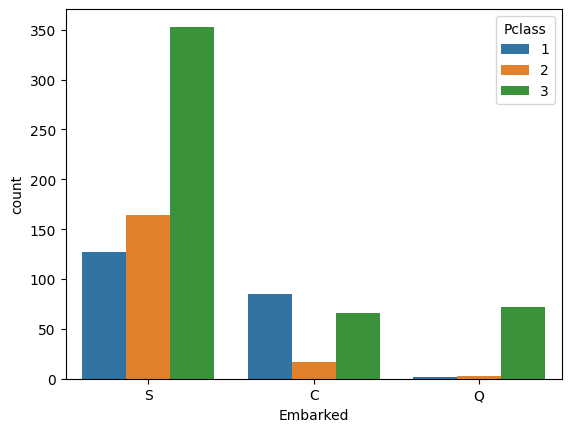

In [83]:
sns.countplot('Embarked', data = titanic_df, hue = 'Pclass', order = ['S','C','Q']) 
# to see whom from which class came from which cities?

--> A majority of people who were on board of all classes, were from Southhampton.

In Queenstown, lot of people that boarded there were third class. 

--> This questions the economic situation of both Southhampton and Queenstown.  

In [84]:
# 4. who was alone and who was with family? 

In [85]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


--> Sibsp - if the person had siblings on board


--> Parch - if the person had a parent or child on board 

In [100]:
titanic_df['Alone']  = titanic_df.SibSp + titanic_df.Parch 

In [101]:
titanic_df['Alone'].loc[:10]

0     1
1     1
2     0
3     1
4     0
5     0
6     0
7     4
8     2
9     1
10    2
Name: Alone, dtype: int64

Here, we conclude that passengers with value of 1 or more if "Alone" feature are with eithe their sibling/parents
or children. And passengers with value 0 to be alone

In [102]:
titanic_df['Alone'].loc[titanic_df['Alone'] > 0] = 'With Family'
titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Alone'

/var/folders/01/wbf4q7254sg4vtt9f05q1z8r0000gn/T/ipykernel_23504/1683785825.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df['Alone'].loc[titanic_df['Alone'] > 0] = 'With Family'


In [104]:
titanic_df['Alone'].loc[:10]

0     With Family
1     With Family
2           Alone
3     With Family
4           Alone
5           Alone
6           Alone
7     With Family
8     With Family
9     With Family
10    With Family
Name: Alone, dtype: object

<AxesSubplot: xlabel='Alone', ylabel='count'>

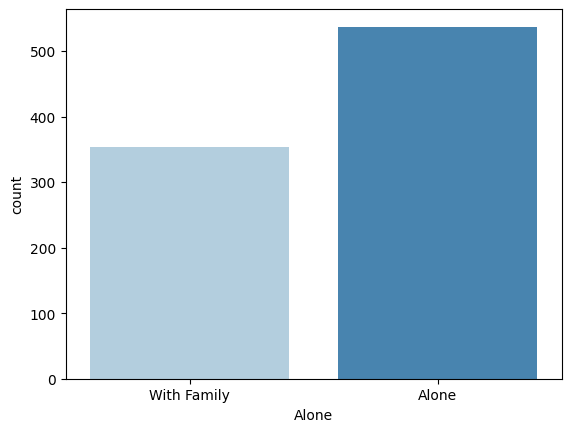

In [105]:
sns.countplot('Alone', data = titanic_df, palette = 'Blues')

We can observe that the ratio of people who were alone were much higher than those who were with family

In [106]:
# 5. What factors helped someone survive the sinking? 

Now we convert the values of survivor column to 'yes' or 'no' instead of 0 and 1 and store them in a new column "Survivor"

<AxesSubplot: xlabel='Survivor', ylabel='count'>

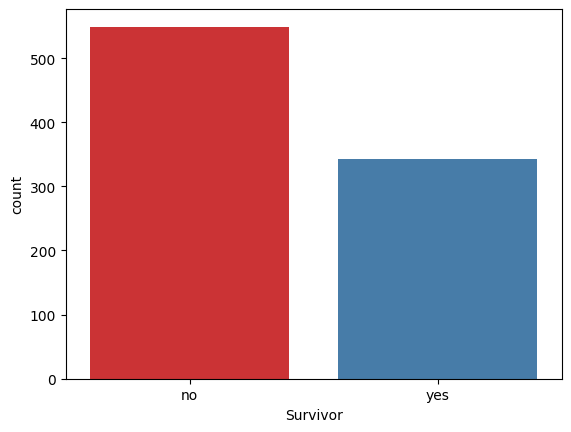

In [109]:
titanic_df['Survivor'] = titanic_df.Survived.map({0:'no',1:'yes'})

sns.countplot('Survivor', data = titanic_df, palette = 'Set1')

The above plot lets us know that they were more people who did not survive the sinking of Titanic than those who survived. 

--> We shall now see if being a first class passenger had any advantages in being a survivor

<AxesSubplot: xlabel='Pclass', ylabel='Survived'>

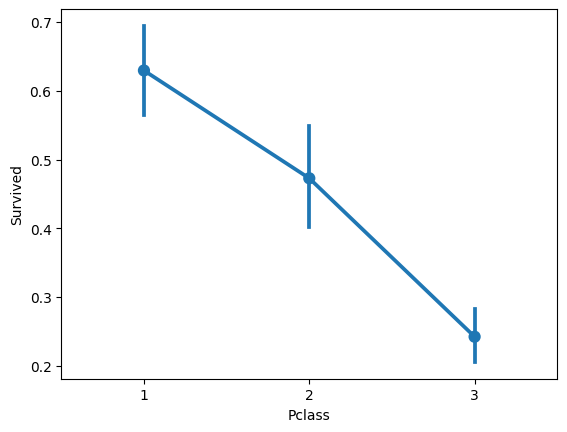

In [110]:
sns.pointplot('Pclass', 'Survived', data = titanic_df)

This shows a high chance of survival for first class passengers and then to the second class. Now let's check if variable "sex" has any effect in the above observation 

<AxesSubplot: xlabel='Pclass', ylabel='Survived'>

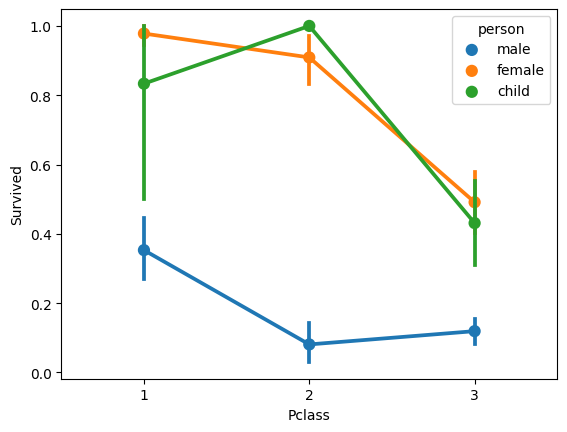

In [112]:
sns.pointplot('Pclass','Survived', hue = 'person', data = titanic_df)

From the above plot, we can notice that both being male and being a passenger of third class did not help in the favor of survival for men on board. Even being a first class passenger, male passengers were lowest on the chance of survival. That concludes regardlesss of class, the result of being male decreases the chance of survival 

Now let's check how variable "Age" has an effect on being a survivor

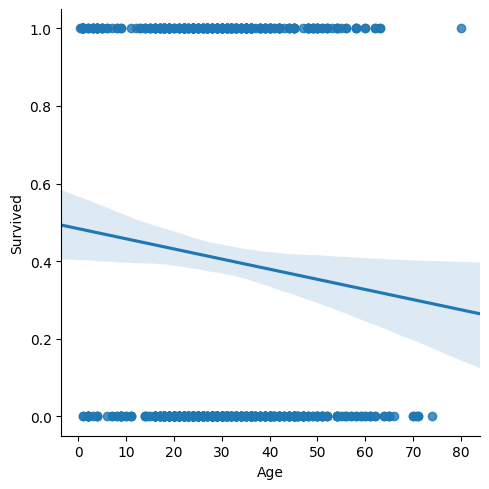

In [113]:
sns.lmplot('Age','Survived',data = titanic_df)

The points which are on the 0 on y-axis(bottom points) are of those who did not survived and corresponding age on x- axis.
The points at 1 on y-axis are people who survived. 

--> The linear line in the middle shows a general trend, that  the older the passenger was, the less likely they survived. 
Let's see if class has any effect in above scenario with the help of hue parameter.

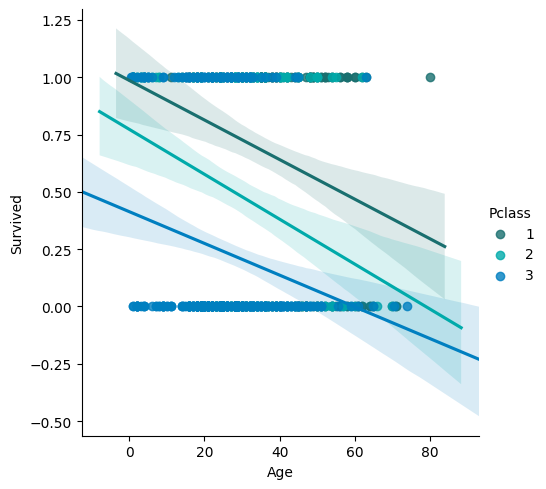

In [115]:
sns.lmplot("Age","Survived", hue = "Pclass", data = titanic_df, palette= "winter_d")

Next up, we clean up the plot a bit by putting the x values(Age) in bins and then plotting a regression line plot on it. 

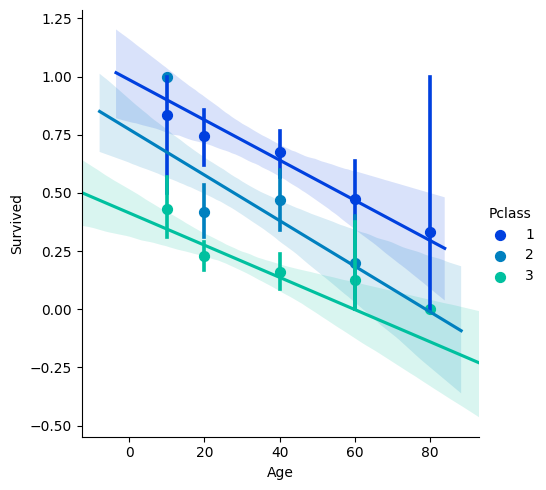

In [116]:
# Here we use hue for class seperation on linear plot
generation = [10,20,40,60,80]

sns.lmplot('Age','Survived', hue = 'Pclass', data = titanic_df, palette = 'winter', x_bins = generation)

The longer line showed on older people in first class depicts higher standard deviation

Let's see how how "sex" and 'Age' relates with survived" feature 

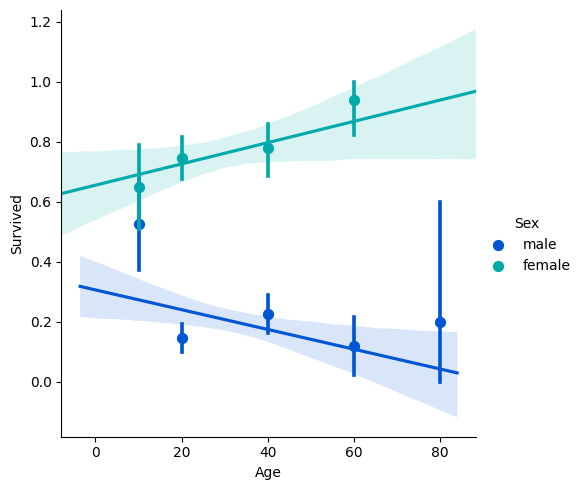

In [119]:
sns.lmplot("Age","Survived", hue = 'Sex', data = titanic_df, palette = "winter", x_bins = generation)

By above plot, we can see that, being an older female has better chances of surviving than being an older male.

Now let's check the following problem statements:
1. Did the deck have an effect on the passengers survival rate? 
2. Did being male or female has a different effect irrespective of being in any deck for the chances of survival? 
3. Did having a family member increase the odds of surviving the crash? 

In [121]:
# 1.Did the deck have an effect on the passengers survival rate?

In [126]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no


In [152]:
# creating a seperate series for 'survived' variable 
survivor_df = DataFrame(titanic_df['Survived'].copy())
survivor_df

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [153]:
survivor_df.columns = ['survived']

In [154]:
# concatinating both the dataframes to obtain "cabin" and "survived" features in one dataframe
survivor_cabin_df = pd.concat([cabin_df,survivor_df],axis = 1)

In [155]:
survivor_cabin_df

,Cabin,survived
106,A,1
33,A,0
41,A,0
97,A,1
146,A,1
...,...,...
886,NaN,0
887,NaN,1
888,NaN,0
889,NaN,1


In [156]:
# dropping the NaN values since more than 50% of NaN values are present in "cabin" feature 
survivor_cabin_df.dropna(inplace = True)
survivor_cabin_df

,Cabin,survived
106,A,1
33,A,0
41,A,0
97,A,1
146,A,1
...,...,...
35,F,0
40,G,0
3,G,1
90,G,0


<AxesSubplot: xlabel='Cabin', ylabel='survived'>

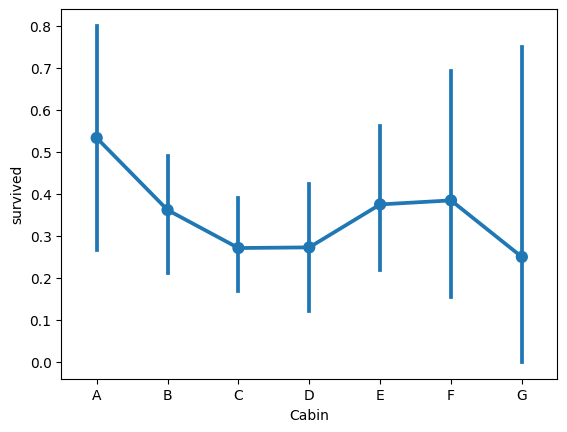

In [163]:
# pointplot 
sns.pointplot('Cabin', 'survived', data = survivor_cabin_df)

The above pointplot gives the probabilities of being a survival with relation to being in certain decks/cabins 
--> It shows a slight inclination towards A,B,E,F cabins to have more chances of survival than other ones. It could also be reason for those cabins to have more entries of passengers in given data. 

-> However, we observe that no probaility rate of cabin for survival is more than 50% in above plot

-> We look more into it with the help of countplot 


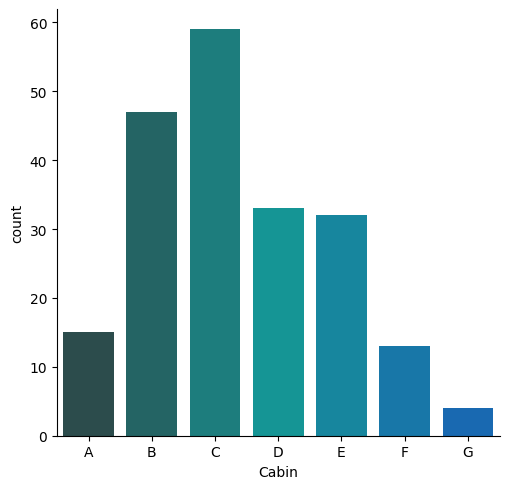

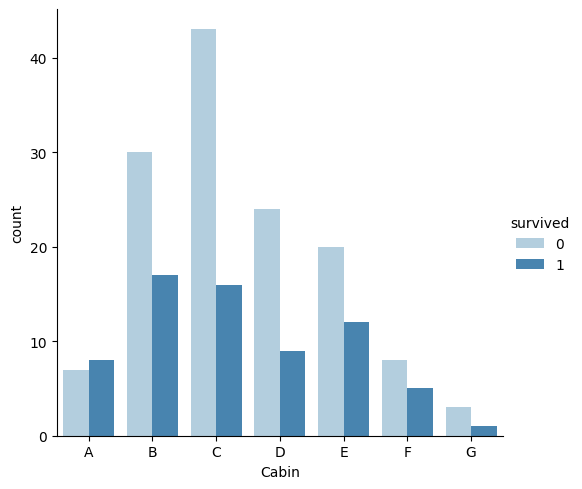

In [167]:
sns.catplot('Cabin',data = cabin_df, kind = 'count', palette = "winter_d")
sns.catplot('Cabin', data = survivor_cabin_df,hue = 'survived',kind = 'count',palette = 'Blues')
plt.show()

The above two plots gives more insight into the survival rate in cabins, only cabin A shows more that slightly more passengers of cabin A survived than passengers who did not. The other cabins however have more people who did not survive than those who did. Of all cabin G has low survival rate, given that they did not have more passenger to start with. 

-> My take: I guessed there would be more cabins with more survival rate. 

In [182]:
# Did being male or female has a different effect irrespective of being in any deck for the chances of survival?

In [188]:
person_df = titanic_df['person'].copy()
person_df

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: person, Length: 891, dtype: object

In [193]:
survivor_cabin_df = pd.concat([survivor_cabin_df, person_df], axis = 1)
survivor_cabin_df

,Cabin,survived,person
106,A,1.0,female
33,A,0.0,male
41,A,0.0,female
97,A,1.0,male
146,A,1.0,male
...,...,...,...
886,NaN,NaN,male
887,NaN,NaN,female
888,NaN,NaN,female
889,NaN,NaN,male


In [194]:
survivor_cabin_df.dropna(inplace = True)
survivor_cabin_df

,Cabin,survived,person
106,A,1.0,female
33,A,0.0,male
41,A,0.0,female
97,A,1.0,male
146,A,1.0,male
...,...,...,...
35,F,0.0,male
40,G,0.0,female
3,G,1.0,female
90,G,0.0,male


<AxesSubplot: xlabel='Cabin', ylabel='survived'>

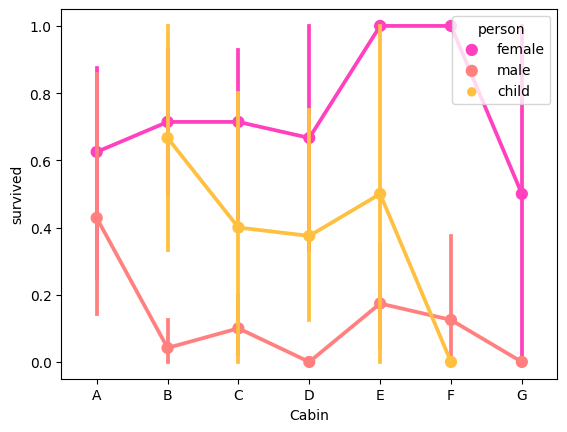

In [196]:
sns.pointplot(x = 'Cabin',y = 'survived', data = survivor_cabin_df,hue = 'person', palette = 'spring')

The above pointplot indicates that being a male and female does have a different effect from the above pointplot we did to check the survival rate. Female and infact also being a child has had a huge impact in surviving regardless of which cabin they belong to 

In [197]:
# Did having a family member increase the odds of surviving the crash?

In [199]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no


<AxesSubplot: xlabel='Alone', ylabel='Survived'>

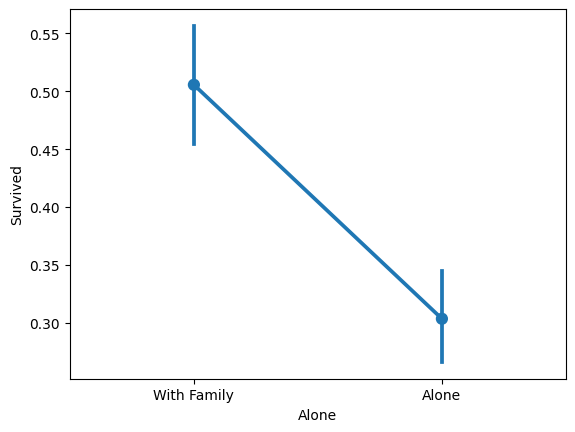

In [205]:
sns.pointplot('Alone','Survived', data = titanic_df)

We shall notice from above plot, that having a family member did increase the odds of surviving the crash than being alone. 